# Modelo RANDON FOREST

In [50]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [51]:
import sys
sys.path.append("C:\\Users\\Alberto\\Documents\\GitHub\\REPO_PUSH\\Machine-Learning\\src")
from utils.Funciones import graph_feat

## Cargamos los datos de entrada del archivo .csv Train

In [52]:
# Load data
train = pd.read_csv('../data/Processed/train_processed.csv', sep=',')
df_train=pd.DataFrame(train)
df_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,...,1,0,0,1,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,...,0,1,0,0,0,0,0,1,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,...,0,1,1,0,0,0,0,0,0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,...,0,1,1,0,0,0,0,0,0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,0,...,1,0,1,0,0,0,0,0,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,1,...,0,1,0,0,0,0,0,0,1,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,1,...,0,1,0,0,0,0,0,0,1,0
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,0,...,0,1,0,0,0,0,1,0,0,0


In [53]:
# Definimos las variables que me guardan los datos a entrenar separados del target 
y=df_train['Transported']

X=df_train[['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Earth', 'Europa', 'Mars', 'Cabin_num',
       'Cabin_Side_P', 'Cabin_Side_S', 'Cabin_Deck_A', 'Cabin_Deck_B',
       'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E', 'Cabin_Deck_F',
       'Cabin_Deck_G', 'Cabin_Deck_T']]

In [54]:
#Separamos los datos 70% Train, 30% Test (Es la proporcion pedida en Kaggel)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print(f"X_train: {X_train.shape}\ty_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\ty_test: {y_test.shape}")

X_train: (6085, 22)	y_train: (6085,)
X_test: (2608, 22)	y_test: (2608,)


### (Optional) Random forest without parameter tuning

In [55]:
# y aqui ya aplicamos el max_deph recomendado, que es 8 y efectivamente da el mayor Score posible :)
tuned_tree = DecisionTreeClassifier(max_depth=9, splitter='best', criterion= 'entropy', max_leaf_nodes=80, class_weight='balanced',random_state=17)
tuned_tree.fit(X_train, y_train)
tuned_tree_predictions = tuned_tree.predict(X_test)
print("Cross Validation Score (max_depth=11)",accuracy_score(y_test, tuned_tree_predictions))

Cross Validation Score (max_depth=11) 0.7887269938650306


### (Optional) Random forest with parameter tuning

In [56]:
from sklearn.model_selection import GridSearchCV
forest_params = {'max_depth': range(1, 16),
                 'max_features': range(1, 20, 5)}

locally_best_forest = GridSearchCV(RandomForestClassifier(n_estimators=10, random_state=17,n_jobs=4), forest_params, cv=3, verbose=1, n_jobs=4)

locally_best_forest.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=4,
                                              random_state=17),
             n_jobs=4,
             param_grid={'max_depth': range(1, 16),
                         'max_features': range(1, 20, 5)},
             verbose=1)

In [57]:
print("Best params:", locally_best_forest.best_params_)
print("Best cross validaton score", locally_best_forest.best_score_)

Best params: {'max_depth': 9, 'max_features': 11}
Best cross validaton score 0.7903053651053803


In [58]:
tuned_forest_predictions = locally_best_forest.predict(X_test) 
print('MODELO RANDOM FOREST')
print("ACCURACY TRAIN:",accuracy_score(y_test,tuned_forest_predictions))

MODELO RANDOM FOREST
ACCURACY TRAIN: 0.8017638036809815


### Random forest

In [59]:
# Creamos el modelo

rf = RandomForestClassifier(n_estimators=100, random_state=17, min_samples_leaf=1, max_depth=7, max_features=5, bootstrap= True, n_jobs=-1)
rf.fit(X_train, y_train)
forest_predictions=rf.predict(X_test)

In [60]:
#Hacemos la prediccion y mostramos el resultado
print('MODELO RANDOM FOREST')
print("Training Score: {}".format(rf.score(X_train, y_train)))
print("Test Score: {}".format(rf.score(X_test, y_test)))

MODELO RANDOM FOREST
Training Score: 0.8238290879211175
Test Score: 0.8132668711656442


In [61]:
import sklearn.metrics as metrics
predictions = rf.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[1035  261]
 [ 226 1086]]


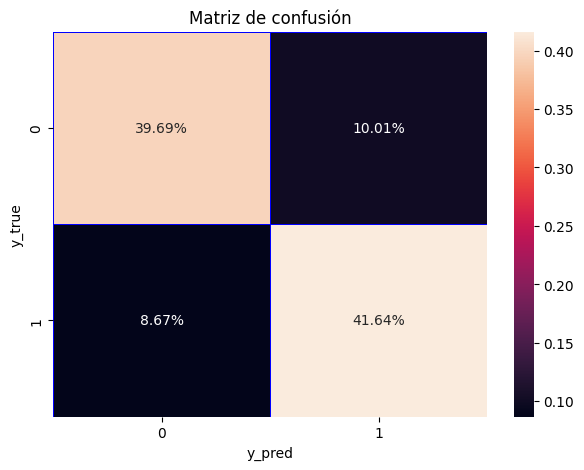

In [62]:
f, ax=plt.subplots(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, linewidths=0.5, fmt='.2%', linecolor="blue")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Matriz de confusión")
plt.show()

In [63]:
def graph_feat(model,X):
    feat_impor = pd.DataFrame(model.feature_importances_)
    fimport = feat_impor.set_axis(X.columns, axis='index')
    fimport.sort_values(by=[0], ascending= False, inplace = True)
    fig = plt.figure(figsize=(12, 8))
    plt.barh(fimport.index, fimport[0])
    plt.xlabel('Feature Importances')
    plt.xticks(rotation = 90)
    plt.ylabel('Feature Labels')
    plt.title('Comparacion de la importancia de las variables')
    return plt.show()

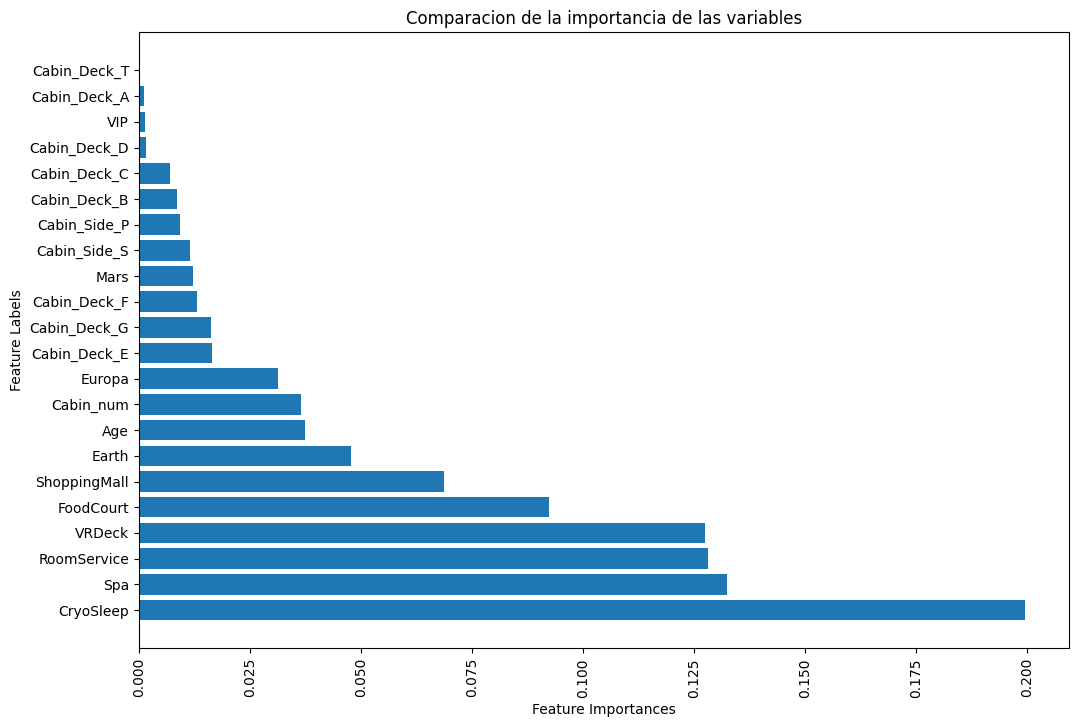

In [64]:
graph_feat(rf, X_train)

## Cargamos los datos de entrada del archivo .csv Test

In [65]:
# Load data
test = pd.read_csv('../data/Processed/test_processed.csv', sep=',')
df_test=pd.DataFrame(test)
df_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,1,0,0,1,0,0,0,0,0
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,1,0
4273,0,42.0,0,0.0,847.0,17.0,10.0,144.0,1,0,...,1,0,0,0,0,0,0,0,1,0
4274,1,26.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,1,0,0,0,0,1,0,0,0,0
4275,0,26.0,0,0.0,2680.0,0.0,0.0,523.0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [66]:
testID = pd.read_csv('../data/Raw/test.csv', sep=',')

In [67]:
prediccion_test = pd.DataFrame(rf.predict(df_test))
prediccion_test['PassengerId'] =testID['PassengerId']
prediccion_test = prediccion_test.rename(columns = {0:'Transported'})
prediccion_test = prediccion_test[['PassengerId','Transported']]
prediccion_test.to_csv('../data/output/Random_Forest.csv', index=False)
prediccion_test

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
